In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train[0].shape

(28, 28)

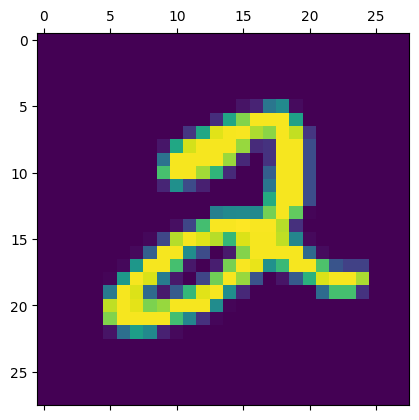

In [4]:
plt.matshow(X_train[5])

In [5]:
# Scaling the features to get a higher accuracy
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# Reshaping the 28*28 2D Array into 1D Array
X_train_flattened = X_train.reshape(len(X_train) , 28*28)

In [7]:
X_train_flattened.shape

(60000, 784)

In [8]:
X_test_flattened = X_test.reshape(len(X_test) , 28*28)

In [9]:
X_test_flattened.shape

(10000, 784)

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape = (784,) , activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened , y_train , epochs = 5)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 757us/step - accuracy: 0.8152 - loss: 0.7232
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.9138 - loss: 0.3100
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.9201 - loss: 0.2825
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.9260 - loss: 0.2712
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.9237 - loss: 0.2696


In [11]:
model.evaluate(X_test_flattened , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.9137 - loss: 0.3022


[0.26679131388664246, 0.9247000217437744]

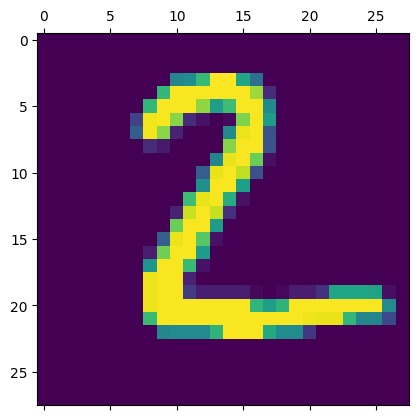

In [12]:
plt.matshow(X_test[1])

In [13]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step


array([2.47020591e-02, 2.45500445e-07, 6.26865476e-02, 9.59030151e-01,
       2.49620085e-03, 1.17825806e-01, 1.48081938e-06, 9.99796331e-01,
       8.39068517e-02, 7.29392052e-01], dtype=float32)

In [20]:
np.argmax(y_predicted[0])

np.int64(7)

In [39]:
# New array from existing array
y_predicted_lable = [np.argmax(i) for i in y_predicted]

In [40]:
y_predicted_lable[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [32]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [17]:
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predicted_lable)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    4,    5,    2,    3,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,    9,  913,   20,   11,    5,   13,   10,   40,    4],
       [   2,    0,   17,  930,    0,   19,    2,   12,   19,    9],
       [   1,    1,    3,    1,  920,    0,   11,    4,    6,   35],
       [   9,    1,    2,   37,   11,  770,   14,    7,   33,    8],
       [   9,    3,    6,    1,    7,   12,  916,    2,    2,    0],
       [   1,    5,   20,    8,    9,    0,    0,  945,    3,   37],
       [   7,    7,    6,   22,   10,   28,   10,   14,  861,    9],
       [  10,    7,    1,   10,   29,    6,    0,   22,    4,  920]],
      dtype=int32)>

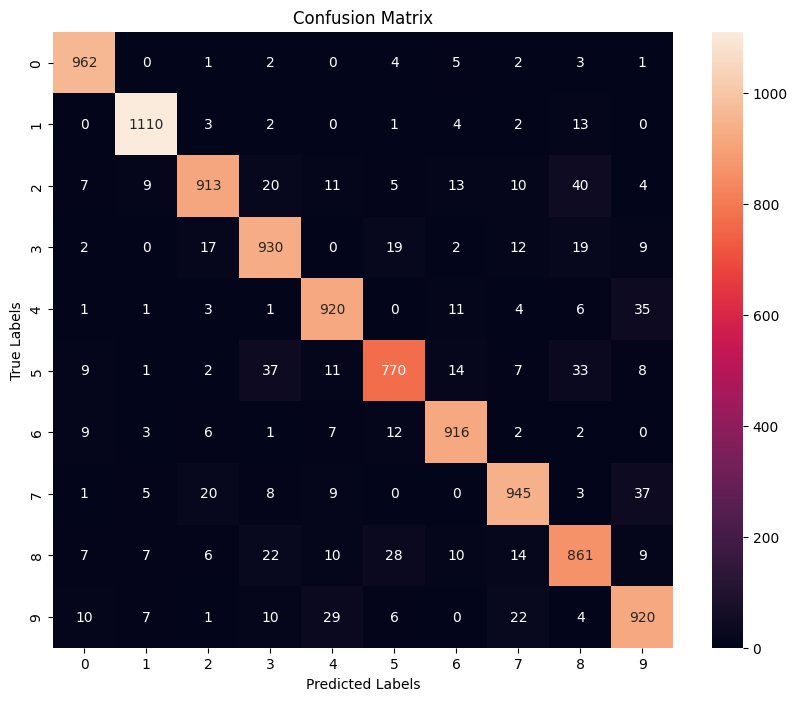

In [18]:
import seaborn as sns
# Assuming 'cm' is your NumPy confusion matrix

plt.figure(figsize=(10, 8))
sns.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
model2 = keras.Sequential([
    keras.layers.Dense(100 , input_shape = (784,) , activation = 'relu'),
    keras.layers.Dense(10 , activation = 'sigmoid')
])

model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model2.fit(X_train_flattened , y_train , epochs = 5)

Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 976us/step - accuracy: 0.8723 - loss: 0.4534
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9616 - loss: 0.1316
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9743 - loss: 0.0857
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9811 - loss: 0.0642
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9844 - loss: 0.0511  


In [ ]:
# just a calculation 
# remember np.argmax will return the index of the maximum value in an array

myarray = [10 , 55 , 4 , 86 , 1 , 45]
myarray[np.argmax(myarray)]


86

In [43]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28 , 28)),
    keras.layers.Dense(100 , input_shape = (784,) , activation = 'relu'),
    keras.layers.Dense(10 , activation = 'sigmoid')
])

model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model2.fit(X_train , y_train , epochs = 5)

Epoch 1/5


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8742 - loss: 0.4495
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9622 - loss: 0.1294
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9745 - loss: 0.0860
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9804 - loss: 0.0642
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9860 - loss: 0.0480


In [45]:
model2.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.9719 - loss: 0.0990


[0.08509200066328049, 0.9757000207901001]

In [6]:
#some matrix exercises
import numpy as np
a1 = np.array([[200 , 220 , 250] , [68 , 79 , 105] , [110 , 140 , 180] , [80 , 85 , 90]])
a2 = np.array([75])

output = a1 * a2
output

array([[15000, 16500, 18750],
       [ 5100,  5925,  7875],
       [ 8250, 10500, 13500],
       [ 6000,  6375,  6750]])